# Image Processing Techniques

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

In [0]:
url1 = '/content/drive/My Drive/CVIT_WORKSHOP_2020/Image Processing'
url2 = '/content/drive/My Drive/CVIT_WORKSHOP_2020/images'

## **Session 1** 
## Image Processing Techniques 
(continuation of day2)

## Morphological Image Processing


### Erosion and Dilation

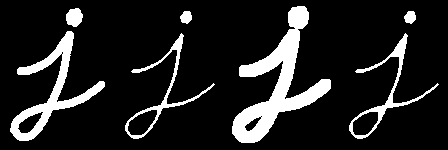

In [4]:
I = cv2.imread(url1 + '/j.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5,5),np.uint8)
erosion1 = cv2.erode(I,kernel,iterations = 1)
dilation = cv2.dilate(I,kernel,iterations = 1)
erosion2 = cv2.erode(dilation,kernel,iterations = 2)
cv2_imshow(np.hstack([I,erosion1,dilation,erosion2]))

### Opening and Closing - Fingerprint Problem


[[1 1 1]
 [1 1 1]
 [1 1 1]]


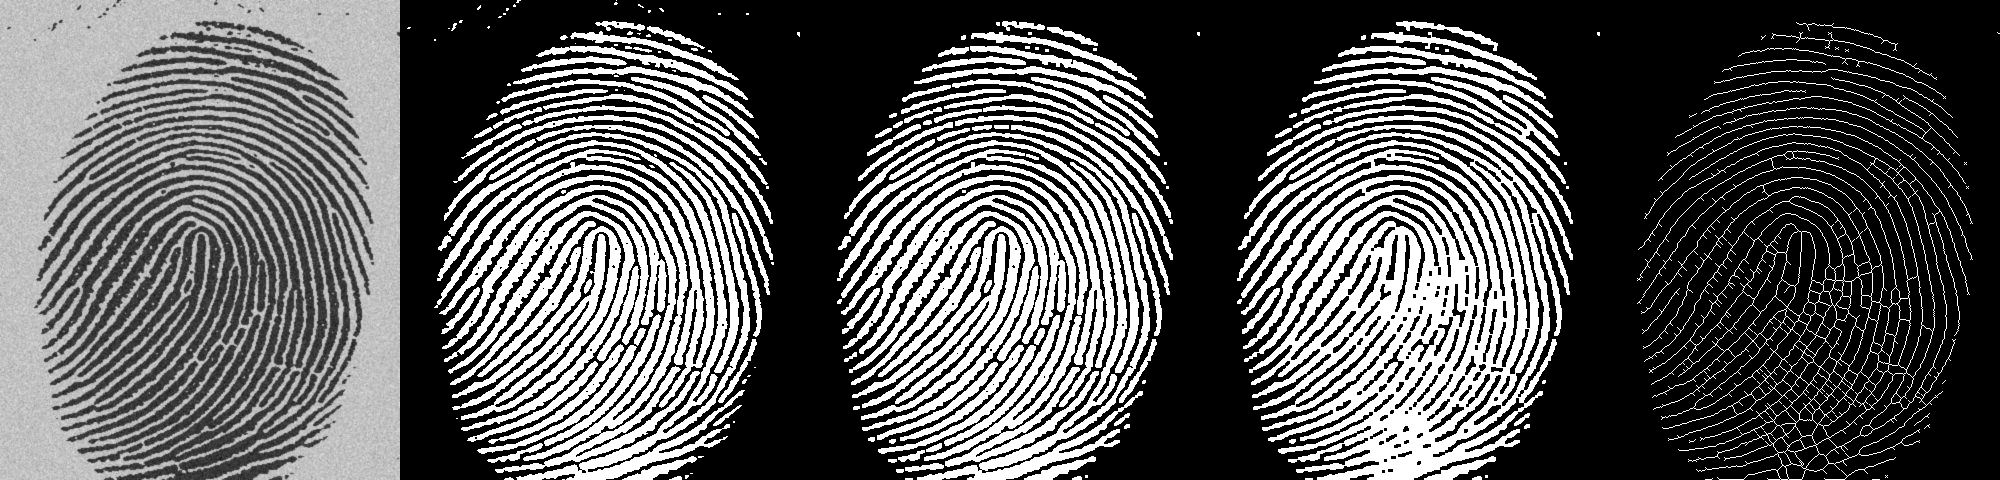

In [5]:
I = cv2.imread(url1 + '/FingerPrint.jpg', cv2.IMREAD_GRAYSCALE)
ret,binary = cv2.threshold(I,125,255,cv2.THRESH_BINARY_INV)
se = morp.square(3,dtype='uint8')
print (se)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, se)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, se)
closing2 = closing/255
# skeletonization, value can be o to 1
final = morp.medial_axis(closing2)*255
cv2_imshow(np.hstack([I, binary, opening, closing, final]))

### **HW 1**
Write a script which reads 'coin.jpg' as input and outputs a new image containing:
Also count the number of coins in each case.

1. only the coins touching the boundary of the image,
2. only the coins which overlap with each other,
3. only non-overlapping coins.


In [0]:
def gray_components(labels):
  img = labels * (255 // np.max(labels))
  cv2_imshow(img)

def color_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179 * labels / np.max(labels))
    blank_ch = 255 * np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue == 0] = 0

    cv2_imshow(labeled_img)

In [0]:
I = cv2.imread(url1 + '/coins.jpg', cv2.IMREAD_GRAYSCALE)
ret,binary = cv2.threshold(I,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

no. of coins: 11


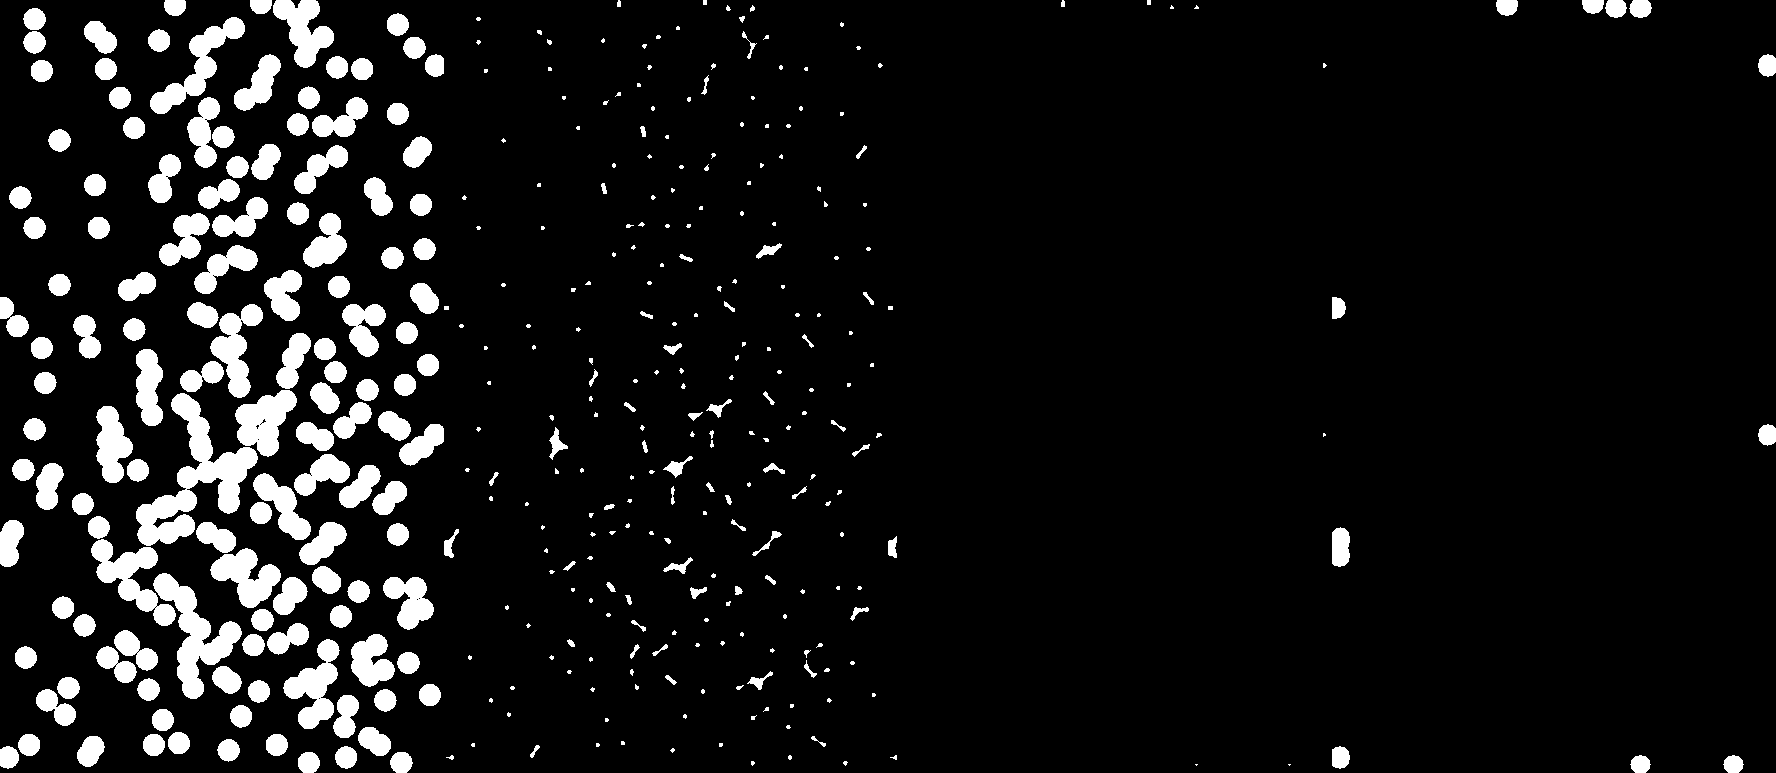

In [117]:
# coins touching the boundary of the image

r = 9

kernel = morp.disk(r, dtype='uint8')
erosion = cv2.erode(binary,kernel,iterations = 1)
mod = erosion.copy()
mod[r: mod.shape[0] - r, r: mod.shape[1] - r] = 0
dilation = cv2.dilate(mod,kernel,iterations = 1)
num_labels, labels_im = cv2.connectedComponents(dilation)
print("no. of coins: " + str(num_labels-1))
cv2_imshow(np.hstack([binary, erosion, mod, dilation]))

no. of coins: 72


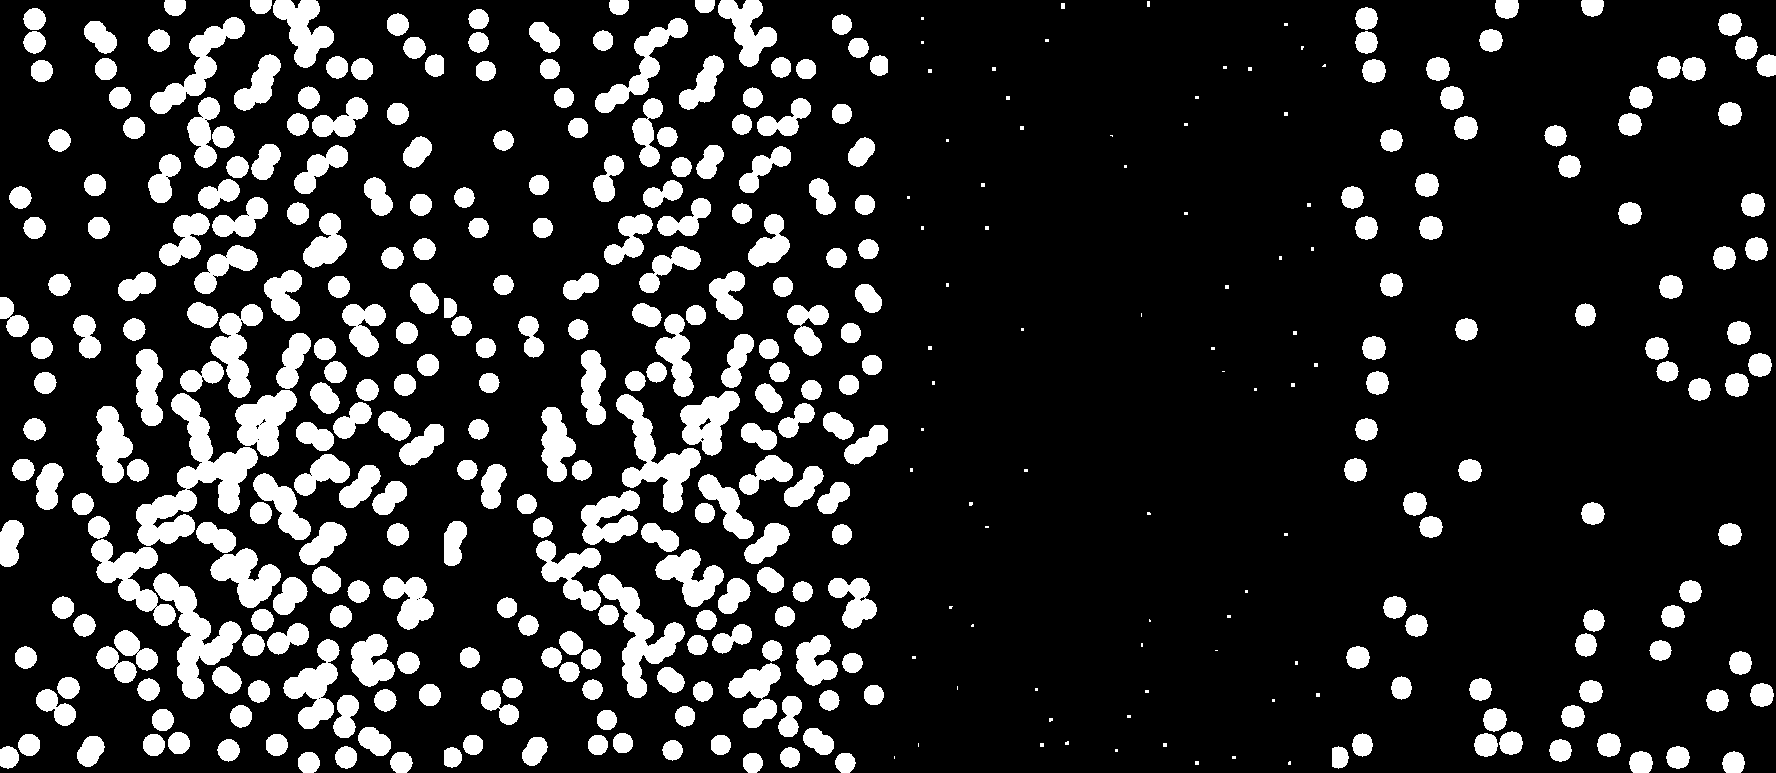

In [118]:
# non - overlapping coins

img = cv2.erode(binary, morp.disk(1))
ker = morp.disk(6)
ker1 = np.zeros((25, 25))
ker1[6:19,6:19] = ker
ker1[0,:] = -1
ker1[-1,:] = -1
ker1[:,0] = -1
ker1[:,-1] = -1
out_img = cv2.morphologyEx(img, cv2.MORPH_HITMISS, ker1)
img1 = cv2.dilate(out_img, morp.disk(10))
num_labels, labels_im = cv2.connectedComponents(img1)
print("no. of coins: " + str(num_labels-1))
cv2_imshow(np.hstack([binary, img, out_img, img1]))

no. of coins: 67


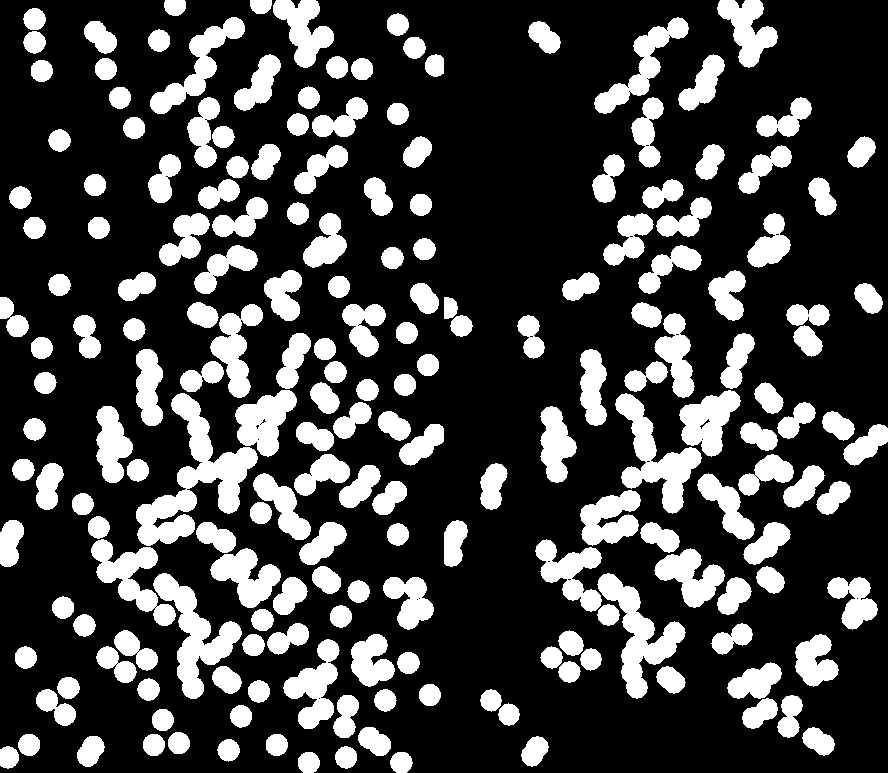

In [119]:
# overlapping coins

img2 = binary - img1
img2 = cv2.morphologyEx(img2, cv2.MORPH_OPEN, morp.disk(9))
num_labels, labels_im = cv2.connectedComponents(img2)
print("no. of coins: " + str(num_labels-1))
cv2_imshow(np.hstack([binary, img2]))

### **HW 2**
Read the image 'objects.png' and try to answer the following questions using code.
Identify means plot the following objects.

1. How many objects have one or more holes?
2. How many square objects are in the image?
3. Identify the square objects that have holes.
4. Identify the circular objects that have no holes.


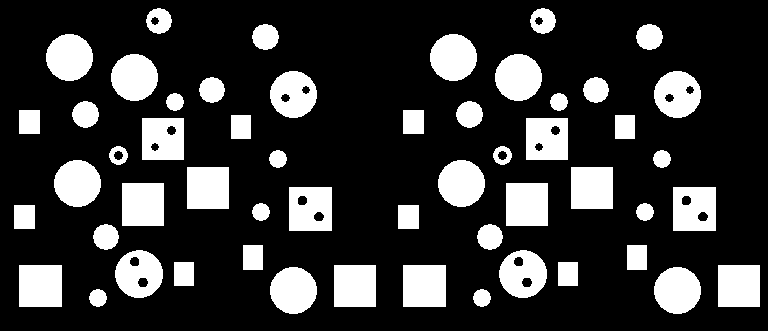

In [74]:
I = cv2.imread(url1 + '/objects.png', cv2.IMREAD_GRAYSCALE)
ret,binary = cv2.threshold(I,0,255,cv2.THRESH_BINARY)
cv2_imshow(np.hstack([I, binary]))

### **HW 3**
Write a script which takes the image 'text2.png' as input and outputs the number of components for each of the five colors. Note that the components may be non-letters (e.g. . and |) Use thresholding and connected components to solve this. You can crop image for each colour manually.

(678, 871)


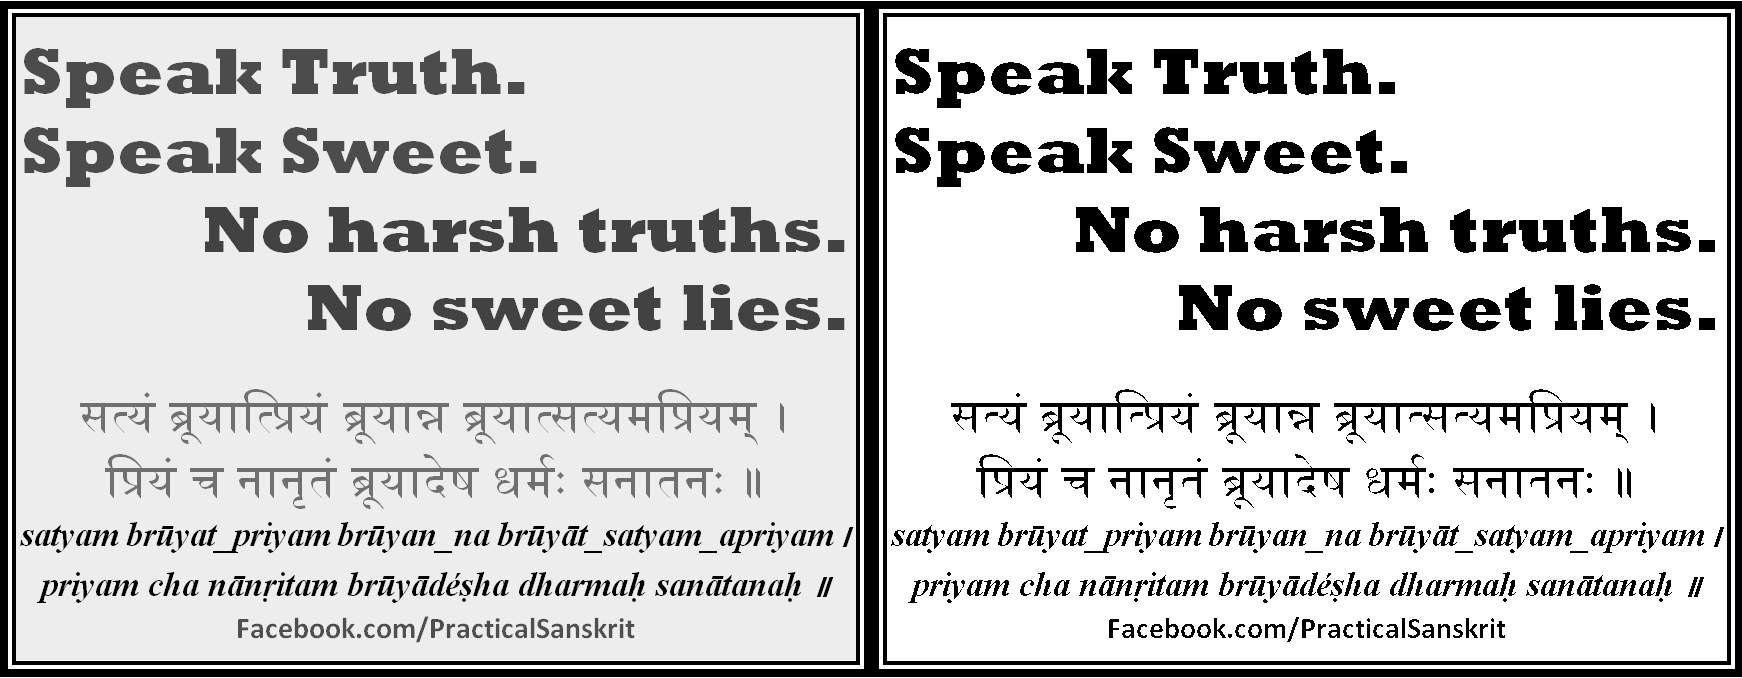

Connected Components: 12


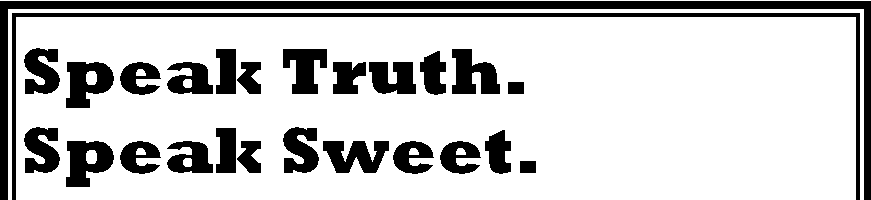

Connected Components: 10


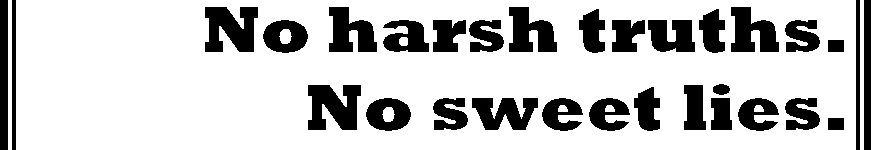

Connected Components: 10


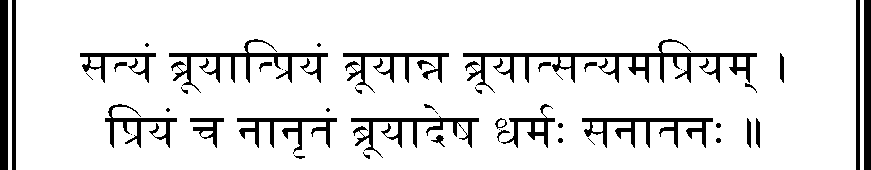

Connected Components: 4


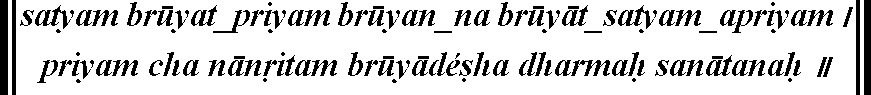

Connected Components: 14


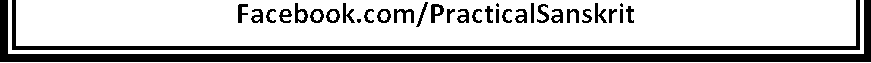

In [123]:
I = cv2.imread(url1 + '/text2.png', cv2.IMREAD_GRAYSCALE)
ret,binary = cv2.threshold(I,150,255,cv2.THRESH_BINARY)
cv2_imshow(np.hstack([I, binary]))
img1, img2, img3, img4, img5 = binary[:200,:], binary[200:350,:], binary[350:520,:], binary[520:615,:], binary[615:,:]
cc = lambda image: cv2.connectedComponents(image)[0]
print("Connected Components: " + str(cc(img1)))
cv2_imshow(img1)
print("Connected Components: " + str(cc(img2)))
cv2_imshow(img2)
print("Connected Components: " + str(cc(img3)))
cv2_imshow(img3)
print("Connected Components: " + str(cc(img4)))
cv2_imshow(img4)
print("Connected Components: " + str(cc(img5)))
cv2_imshow(img5)

## **Session 2**

## Geometric Transformations

In [0]:
rgb = lambda I: cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

### **HW 4**
**Chroma Keying**: Perform chroma Keying on the images rose.jpeg and chroma_img.jpg on a suitable background. Experiment with different backgrounds and show some interesting results.

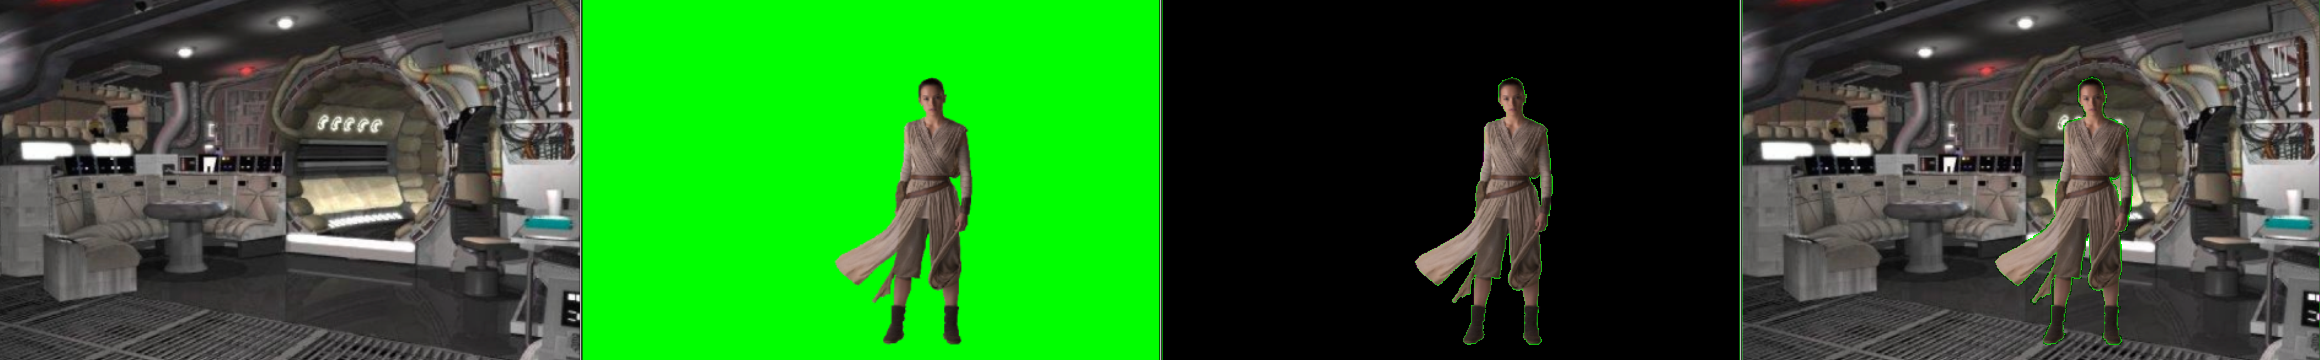

In [0]:
I = cv2.imread(url2 + '/chroma_keying_demo.png')
img1, img2 = I[:, :I.shape[1] // 3, :], I[:, (I.shape[1] // 3):(I.shape[1] // 3) * 2, :]
img3 = np.where(img2 > 210, 0, img2)
img4 = np.where(img3 == 0, img1, img3)
cv2_imshow(np.hstack([img1, img2, img3, img4]))

### Translating an Image

In [188]:
I = cv2.imread(url2 + '/boy_smiling.jpg')
I = rgb(I)
height, width, channels = I.shape
print(height, width)
quarter_height, quarter_width = height / 4, width / 4
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
print(T)

394 400
[[  1.    0.  100. ]
 [  0.    1.   98.5]]


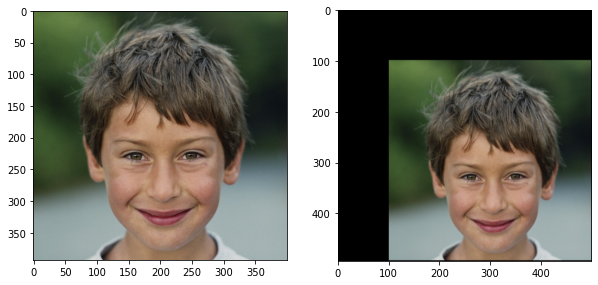

In [0]:
img_translation = cv2.warpAffine(I, T, (width+100, height+100))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 10])
ax1.imshow(I)
ax2.imshow(img_translation)
plt.show()

### Rotating an Image

In [0]:
M1 = cv2.getRotationMatrix2D((width/2, height/2), 45, 1)
M2 = cv2.getRotationMatrix2D((0, 0), 45, 1)
im_rotation1 = cv2.warpAffine(I, M1, (width+100, height+100))
im_rotation2 = cv2.warpAffine(I, M2, (width+100, height+100))
print('first rotation matrix :')
print(M1)
print('Second rotation matrix :')
print(M2)

first rotation matrix :
[[  0.70710678   0.70710678 -80.72139213]
 [ -0.70710678   0.70710678 199.12132034]]
Second rotation matrix :
[[ 0.70710678  0.70710678  0.        ]
 [-0.70710678  0.70710678  0.        ]]


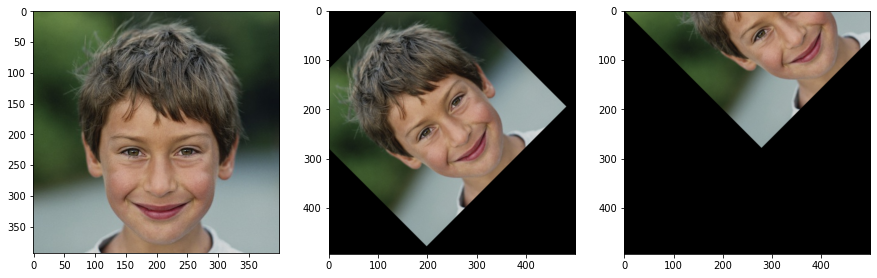

In [0]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[15, 15])
ax1.imshow(I)
ax2.imshow(im_rotation1)
ax3.imshow(im_rotation2)
plt.show()

### Image Scaling

Scaling matrix :
[[   2.    0. -200.]
 [  -0.    2. -197.]]


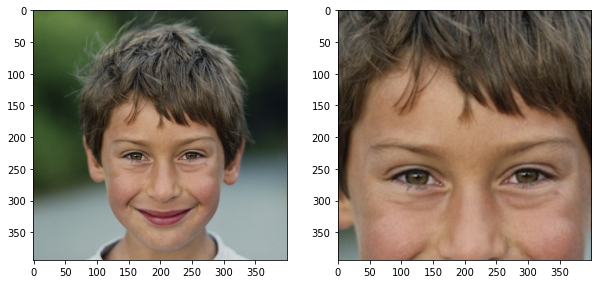

In [0]:
M = cv2.getRotationMatrix2D((width/2, height/2), 0, 2)
im_scaling = cv2.warpAffine(I, M, (width, height))
print("Scaling matrix :")
print(M)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 10])
ax1.imshow(I)
ax2.imshow(im_scaling)
plt.show()

### Affine Transformation

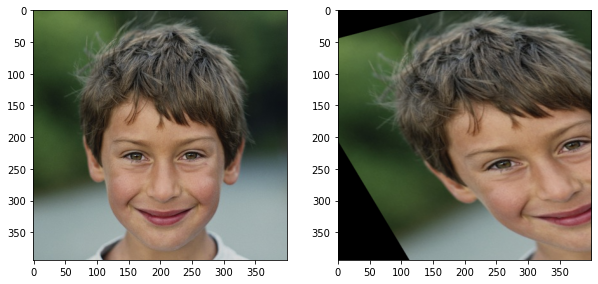

In [0]:
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

M = cv2.getAffineTransform(pts1, pts2)
im_affine = cv2.warpAffine(I, M, (width, height))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 10])
ax1.imshow(I)
ax2.imshow(im_affine)
plt.show()

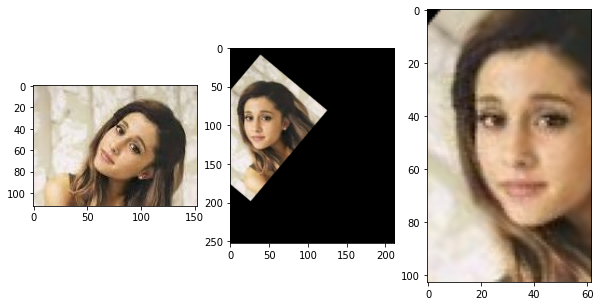

In [169]:
### Affine Transformation example

I = cv2.imread(url2 + '/tilted_face.jpg')
I = rgb(I)
width, height, channels = I.shape
M = cv2.getRotationMatrix2D((width/2+50, height/2+50), 50, 1)
im_rot = cv2.warpAffine(I, M, (width+100, height+100))
T = np.float32([[1, 0, 0], [0, 1, -50]])
im_trans = cv2.warpAffine(im_rot, T, (width-50, height-50))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[10, 10])
ax1.imshow(I)
ax2.imshow(im_rot)
ax3.imshow(im_trans)
plt.show()

### **HW 5**
**Face Alignment**: Read the image 'face.jpg' and rotate the image such that eyes are aligned with respect to the x axis. Then show only the face by taking coordinates from the user and scale to the same size.


In [0]:
def align_face(I, eyeL, eyeR, scaling_factor):
  height, width, channels = I.shape
  tan = (eyeR[0] - eyeL[0]) / (eyeR[1] - eyeL[1])
  theta = np.arctan(tan) * 180 / np.pi
  M = cv2.getRotationMatrix2D((eyeL[1], eyeL[0]), theta, 1)
  im_rot = cv2.warpAffine(I, M, (width, height))
  M = cv2.getRotationMatrix2D((width/2, height/2), 0, scaling_factor)
  im_scaling = cv2.warpAffine(im_rot, M, (width, height))
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[10, 10])
  ax1.imshow(I)
  ax2.imshow(im_rot)
  ax3.imshow(im_scaling)
  plt.show()

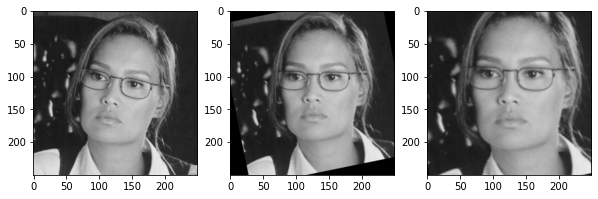

In [198]:
I = cv2.imread(url1 + '/face.jpg')
align_face(rgb(I), (101, 100), (112, 154), 1.2)

### Introduction to Homography

In [0]:
I = cv2.imread(url2 + '/boy_smiling.jpg')
I = rgb(I)
pts1 = np.float32([[50, 50], [300, 150], [25, 387], [389, 390]])
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])

M = cv2.getPerspectiveTransform(pts1, pts2)
im_homography = cv2.warpPerspective(I, M, (300, 300))

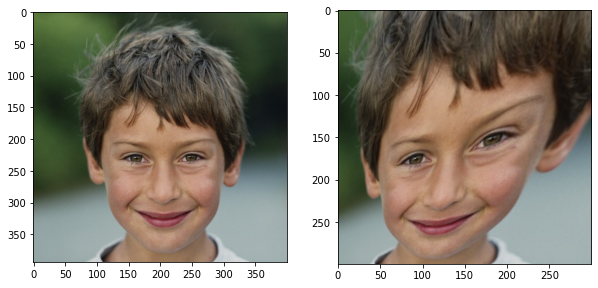

In [0]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 10])
ax1.imshow(I)
ax2.imshow(im_homography)
plt.show()

### **HW 6**
**Perspective Transformation**: Put the banner of coco-cola on the field. Experiment with these functions and show some interesting results.

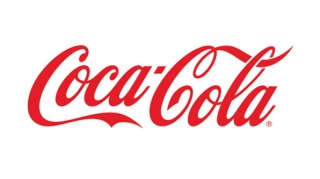

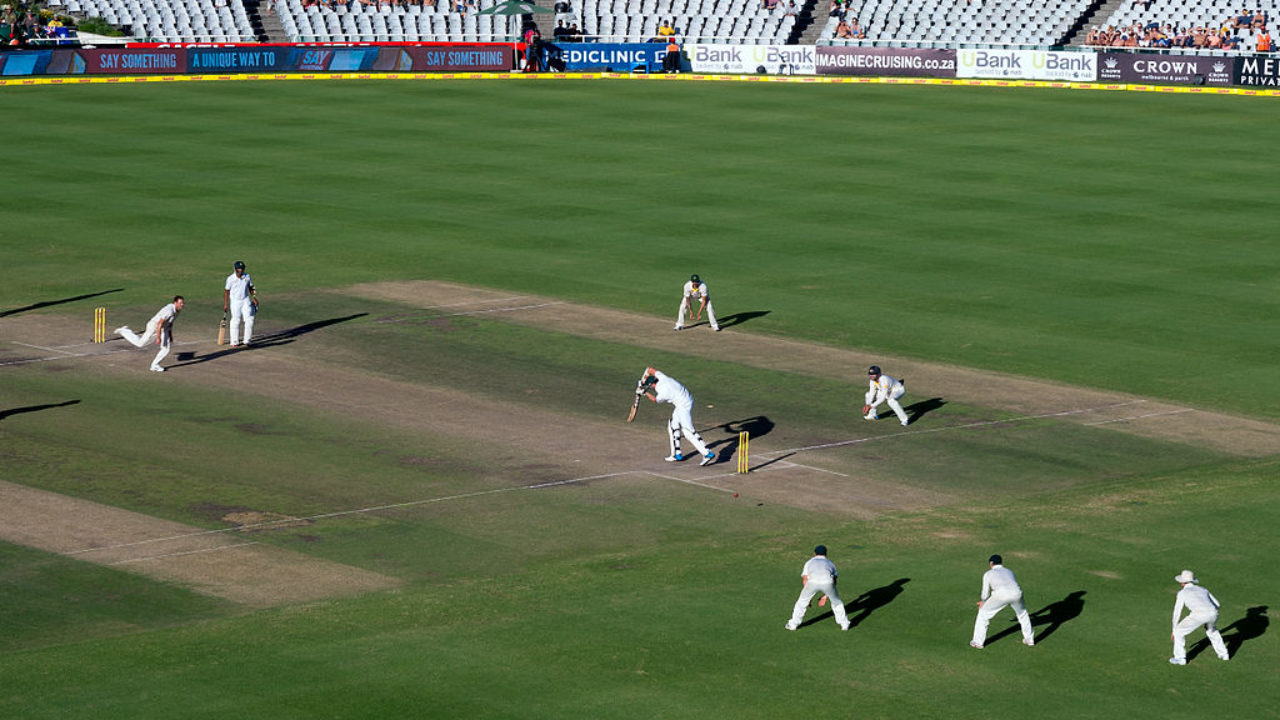

In [0]:
coca = cv2.imread(url2 + '/coca.jpg')
stad = cv2.imread(url2 + '/stadium.jpg')
cv2_imshow(coca)
cv2_imshow(stad)

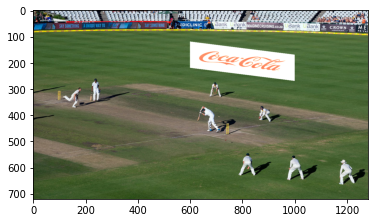

In [0]:
coca = rgb(coca)
stad = rgb(stad)
pts1 = np.float32([[0, 0], [0, 179], [320, 0], [320, 179]])  # cola cords
pts2 = np.float32([[600, 120], [600, 220], [1000, 170], [1000, 270]])  # stadium tile cords
H, status = cv2.findHomography(pts1, pts2) 
im_dst = cv2.warpPerspective(coca, H, (stad.shape[1], stad.shape[0]))  

final = cv2.add(stad, im_dst)
plt.imshow(final)